# **Importing** **The** **Necessary** **Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import keras

# 1) **Exploratory** **Data** **Analysis**(**EDA**)

In [2]:
data=pd.read_csv('/content/movie.csv')

**i**)  **How** **does** **the** **data** **look**?

In [3]:
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
data.shape

(40000, 2)

**ii**) **Are** **there** **any** **duplicate** **values**? **if** **yes**, **then** **what** **to** **do**?

In [5]:
data.duplicated().sum()

277

In [6]:
data.drop_duplicates(inplace=True)

**iii**) **Are** **there** **any** **missing** **values**? **if** **yes** **then** **what** **to** **do**?

In [7]:
data.isnull().sum()

,0
text,0
label,0


**iv**) **Is the data inconsistent somewhere? Is there any other value apart from 0/1 in the sentiment column.**

In [8]:
data.nunique()

,0
text,39723
label,2


In [9]:
data['label'].unique()

array([0, 1])

**v) What is the distribution between positive and negative reviews? Is the data imbalanced or not?**

In [10]:
data['label'].value_counts()

,count
label,
1,19908
0,19815


<Axes: xlabel='label', ylabel='count'>

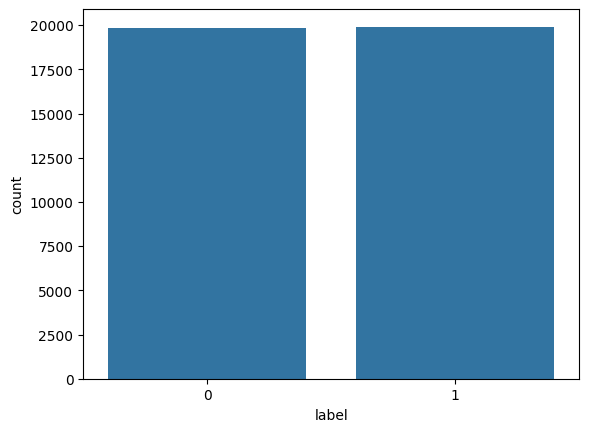

In [11]:
sns.countplot(data=data,x='label')

**vi) What does the length of reviews vs the sentiment graph look like?**

In [12]:
data['review_length']=data['text'].apply(lambda x:len(x))

In [13]:
data.head()

,text,label,review_length
0,I grew up (b. 1965) watching and loving the Th...,0,874
1,"When I put this movie in my DVD player, and sa...",0,1811
2,Why do people who do not know what a particula...,0,983
3,Even though I have great interest in Biblical ...,0,351
4,Im a die hard Dads Army fan and nothing will e...,1,983


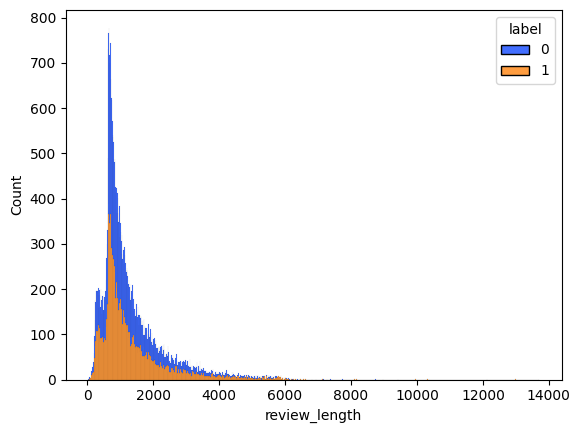

In [14]:
sns.histplot(data=data,bins=1000,hue='label',x='review_length',palette='bright',multiple='stack')
plt.show()

# **2) Data Preprocessing**

**i) Converting all the text into Lowercase for generalisation.**

In [15]:
data['clean_text']=data['text'].str.lower()

In [16]:
data.head()

,text,label,review_length,clean_text
0,I grew up (b. 1965) watching and loving the Th...,0,874,i grew up (b. 1965) watching and loving the th...
1,"When I put this movie in my DVD player, and sa...",0,1811,"when i put this movie in my dvd player, and sa..."
2,Why do people who do not know what a particula...,0,983,why do people who do not know what a particula...
3,Even though I have great interest in Biblical ...,0,351,even though i have great interest in biblical ...
4,Im a die hard Dads Army fan and nothing will e...,1,983,im a die hard dads army fan and nothing will e...


**ii) Removing punctuations**

In [17]:
import string

In [18]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
def remove_punctuations(text):
  punctuations=string.punctuation
  return(text.translate(str.maketrans('','',punctuations)))
data['clean_text']=data['clean_text'].apply(lambda x:remove_punctuations(x))


In [20]:
data.head()

,text,label,review_length,clean_text
0,I grew up (b. 1965) watching and loving the Th...,0,874,i grew up b 1965 watching and loving the thund...
1,"When I put this movie in my DVD player, and sa...",0,1811,when i put this movie in my dvd player and sat...
2,Why do people who do not know what a particula...,0,983,why do people who do not know what a particula...
3,Even though I have great interest in Biblical ...,0,351,even though i have great interest in biblical ...
4,Im a die hard Dads Army fan and nothing will e...,1,983,im a die hard dads army fan and nothing will e...


**iii) Removing stopwords**

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from nltk.corpus import stopwords

In [23]:
stop_words=set(stopwords.words('english'))
def remove_stopwords(text):
  return '  '.join([word for word in str(text).split() if word not in stop_words])

In [24]:
data['clean_text']=data['clean_text'].apply(lambda x:remove_stopwords(x))

In [25]:
data.head()

,text,label,review_length,clean_text
0,I grew up (b. 1965) watching and loving the Th...,0,874,grew b 1965 watching loving thunderbirds ...
1,"When I put this movie in my DVD player, and sa...",0,1811,put movie dvd player sat coke chips exp...
2,Why do people who do not know what a particula...,0,983,people know particular time past like fe...
3,Even though I have great interest in Biblical ...,0,351,even though great interest biblical movie...
4,Im a die hard Dads Army fan and nothing will e...,1,983,im die hard dads army fan nothing ever ...


**iv) Removing rare words**

In [26]:
from collections import Counter
word_count=Counter()
for text in data['clean_text']:
  for word in text.split():
    word_count[word]+=1
word_count.most_common(10)


[('br', 90466),
 ('movie', 66507),
 ('film', 59115),
 ('one', 40594),
 ('like', 31112),
 ('good', 22845),
 ('even', 19579),
 ('would', 19079),
 ('time', 18529),
 ('really', 18330)]

In [27]:
frequent_words=set(word for (word,count) in word_count.most_common(10))
def remove_frequent_words(text):
  return ' '.join([word for word in text.split() if word not in frequent_words])

In [28]:
data['clean_text']=data['clean_text'].apply(lambda x:remove_frequent_words(x))

In [29]:
rare_words=set(word for (word,count) in word_count.most_common(10)[:-10:-1])
def remove_rare_words(text):
  return ' '.join([word for word in text.split() if word not in rare_words])

In [30]:
data['clean_text']=data['clean_text'].apply(lambda x:remove_rare_words(x))

In [31]:
data.head()

,text,label,review_length,clean_text
0,I grew up (b. 1965) watching and loving the Th...,0,874,grew b 1965 watching loving thunderbirds mates...
1,"When I put this movie in my DVD player, and sa...",0,1811,put dvd player sat coke chips expectations hop...
2,Why do people who do not know what a particula...,0,983,people know particular past feel need try defi...
3,Even though I have great interest in Biblical ...,0,351,though great interest biblical movies bored de...
4,Im a die hard Dads Army fan and nothing will e...,1,983,im die hard dads army fan nothing ever change ...


**v) Removing characters other than alphabets and numericals**

In [32]:
import re

In [33]:
def remove_spl_chs(text):
  return re.sub('[^a-zA-Z0-9]',' ',text)


In [34]:
data['clean_text']=data['clean_text'].apply(lambda x:remove_spl_chs(x))

In [35]:
data.head()

,text,label,review_length,clean_text
0,I grew up (b. 1965) watching and loving the Th...,0,874,grew b 1965 watching loving thunderbirds mates...
1,"When I put this movie in my DVD player, and sa...",0,1811,put dvd player sat coke chips expectations hop...
2,Why do people who do not know what a particula...,0,983,people know particular past feel need try defi...
3,Even though I have great interest in Biblical ...,0,351,though great interest biblical movies bored de...
4,Im a die hard Dads Army fan and nothing will e...,1,983,im die hard dads army fan nothing ever change ...


**v) Tokenisation and Stemming**

In [36]:
import nltk
import spacy
import tensorflow as tf
import sklearn
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer=PorterStemmer()
def stem_text(text):
  tokens=word_tokenize(text)
  stemmed=[stemmer.stem(token) for token in tokens]
  return ' '.join(stemmed)

In [38]:
data['clean_text']=data['clean_text'].apply(lambda x:stem_text(x))

In [39]:
data.head()

,text,label,review_length,clean_text
0,I grew up (b. 1965) watching and loving the Th...,0,874,grew b 1965 watch love thunderbird mate school...
1,"When I put this movie in my DVD player, and sa...",0,1811,put dvd player sat coke chip expect hope conta...
2,Why do people who do not know what a particula...,0,983,peopl know particular past feel need tri defin...
3,Even though I have great interest in Biblical ...,0,351,though great interest biblic movi bore death e...
4,Im a die hard Dads Army fan and nothing will e...,1,983,im die hard dad armi fan noth ever chang got t...


**vi) Tokenisation and Lemmatization**

In [40]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
def lem_text(text):
  tokens=word_tokenize(text)
  lemmatized=[lemmatizer.lemmatize(token) for token in tokens]
  return ' '.join(lemmatized)

In [41]:
data['clean_text']=data['clean_text'].apply(lambda x:lem_text(x))

In [42]:
data.head()

,text,label,review_length,clean_text
0,I grew up (b. 1965) watching and loving the Th...,0,874,grew b 1965 watch love thunderbird mate school...
1,"When I put this movie in my DVD player, and sa...",0,1811,put dvd player sat coke chip expect hope conta...
2,Why do people who do not know what a particula...,0,983,peopl know particular past feel need tri defin...
3,Even though I have great interest in Biblical ...,0,351,though great interest biblic movi bore death e...
4,Im a die hard Dads Army fan and nothing will e...,1,983,im die hard dad armi fan noth ever chang got t...


**vii) Perform a Train/test Split.**


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=train_test_split(data.clean_text,data.label,test_size=0.2,random_state=42)



# **3)Feature Extraction**

**i) TF-IDF Vectorizer**

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)

# **4) & 5) Model Selection and Evaluation**

**i) Logestic Regression**

Logestic_regression: 0.8864694776589049 0.9552559901153418 0.8875311720698255


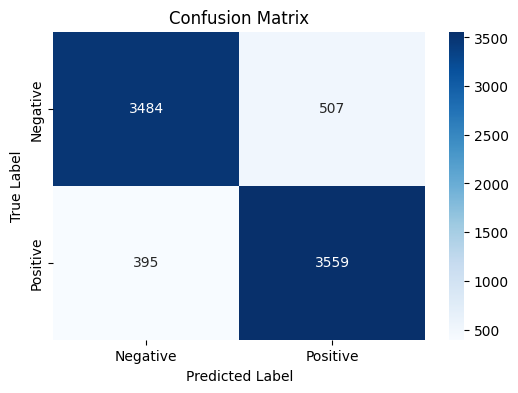

In [47]:
model=LogisticRegression()
model.fit(X_train_tfidf,y_train)
y_pred=model.predict(X_test_tfidf)
y_prob = model.predict_proba(X_test_tfidf)[:, 1]
accuracy=accuracy_score(y_test,y_pred)
roc=roc_auc_score(y_test,y_prob)
f1=f1_score(y_test,y_pred)
confusion2=confusion_matrix(y_test,y_pred)
print('Logestic_regression:',accuracy,roc,f1)
plt.figure(figsize=(6,4))
sns.heatmap(confusion2, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**ii) Bernoulli Naive Bayes Classifier**

Naive_Bayes 0.8635619886721209 0.9371174292385485 0.8631658672052512


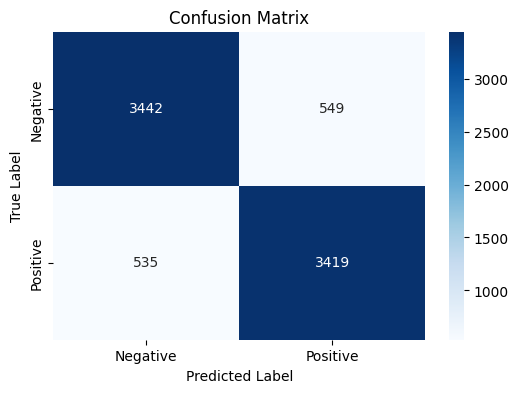

In [49]:

model=MultinomialNB()
model.fit(X_train_tfidf,y_train)
y_pred=model.predict(X_test_tfidf)
y_prob = model.predict_proba(X_test_tfidf)[:, 1]
accuracy=accuracy_score(y_test,y_pred)
roc=roc_auc_score(y_test,y_prob)
f1=f1_score(y_test,y_pred)
confusion1=confusion_matrix(y_test,y_pred)
print('Naive_Bayes',accuracy,roc,f1)
plt.figure(figsize=(6,4))
sns.heatmap(confusion1, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**iii) Random Forests**

Random_Forest 0.846821900566394 0.926636303711677 0.8453817812222081


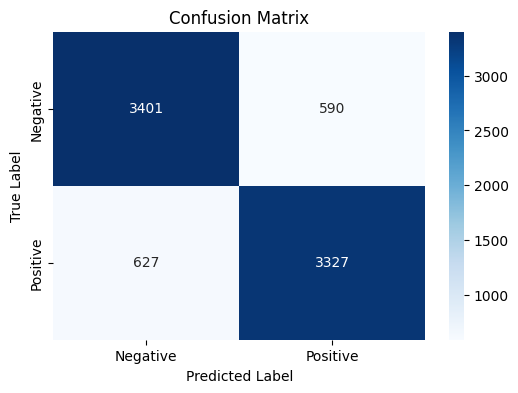

In [51]:
model=RandomForestClassifier()
model.fit(X_train_tfidf,y_train)
y_pred=model.predict(X_test_tfidf)
y_prob = model.predict_proba(X_test_tfidf)[:, 1]
accuracy=accuracy_score(y_test,y_pred)
roc=roc_auc_score(y_test,y_prob)
f1=f1_score(y_test,y_pred)
confusion3=confusion_matrix(y_test,y_pred)
print('Random_Forest',accuracy,roc,f1)
plt.figure(figsize=(6,4))
sns.heatmap(confusion3, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**iv) Support Vector Machine**

Random_Forest 0.8896161107614852 0.8896623688073076 0.8902515329745965


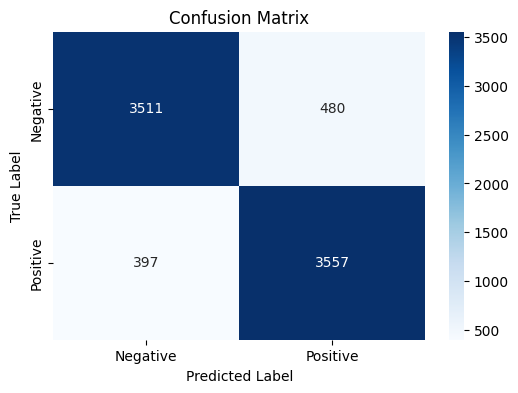

In [55]:
model=LinearSVC()
model.fit(X_train_tfidf,y_train)
y_pred=model.predict(X_test_tfidf)
y_prob = model.predict(X_test_tfidf)
accuracy=accuracy_score(y_test,y_pred)
roc=roc_auc_score(y_test,y_prob)
f1=f1_score(y_test,y_pred)
confusion3=confusion_matrix(y_test,y_pred)
print('SVM',accuracy,roc,f1)
plt.figure(figsize=(6,4))
sns.heatmap(confusion3, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
